<a id="top-of-page"></a>
# Table of Contents #
Click on a chapter:<br>
**[2. Customer Segmentation](#subtask2)<br>**
[a. RFM Segmentation](#a-RFM-segmentation)<br>
[b. Preprocessing from Subtask 1](#b-preprocessing-subtask1)<br>
[c. Select RFM features](#c-RFM-features)<br>
[d. Optimum Cluster Size](#d-optimum-cluster)<br>
[e. Silhouette Score](#e-silhouette-score)<br>
[f. Exploration](#f-exploration)<br>
[g. Summary](#g-summary)<br>
**[2. Geolocation Segmentation](#2-geolocation-segmentation)<br>**
[a. Summary](#2a-summary)<br>
**[3. Conclusion](#3_conclusion)<br>**
**[4. References](#4_references)<br>**

<a id="subtask2"></a>
# 1. Subtask 2: Customer Segmentation

Customer segmentation is dividing customers into different groups based on specific characteristics, such as demographics, behaviours, and buying habits (Karaman, 2019). There are various methods to perform customer segmentation, including RFM segmentation, geolocation segmentation, customer lifetime value segmentation, and psychographic segmentation. RFM segmentation focuses on customers' behaviour in terms of recency, frequency, and monetary value of purchases. Geolocation segmentation is based on a customer's physical location and can be used to target customers in a specific region. Customer lifetime value segmentation divides customers into groups based on their total value to the business over time. Psychographic segmentation categorises customers based on their personality traits, values, and attitudes. Customer behaviour analysis is an observation of how customers interact with a business to learn insights into how the customers are motivated and influenced to buy certain products (Fotanella, 2018).
    
Customer Segmentation can be conducted using models such as geographic or behaviour segmentation (e.g., frequent purchases) (Fotanella, 2018). Therefore, we must first segment the customers into similar groups to target the customers better with personalised product recommendations. We have performed customer segmentation using various methods, including RFM segmentation and geolocation segmentation. These methods effectively identify customer segments that can drive business growth and profitability, making them valuable tools for data-driven decision-making in marketing and sales.

## Chosen Approach ##

Firstly, CLV segmentation requires accurate data on customer transactions, which took much work to obtain for this project. Additionally, CLV segmentation is more suitable for businesses with long-term customer relationships, such as subscription-based services, whereas this project focused more on a one-time purchase. 

Secondly, psychographic segmentation requires extensive data on customer preferences, beliefs, values, and personality traits, which were not available for this project. Moreover, psychographic segmentation is more suitable for businesses that offer products or services closely related to their customer's lifestyles or personalities, such as fashion or beauty industries. In contrast, this project focused on a more generic product.

Therefore, RFM and geolocation segmentation were chosen as it was assumed to provide the best results with the available data and was considered more appropriate for the project's scope.

In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [2]:
# Load and merge CSV files
items = pd.read_csv("data/olist_order_items_dataset.csv")
orders = pd.read_csv("data/olist_orders_dataset.csv")
customers = pd.read_csv("data/olist_customers_dataset.csv")
geolocation = pd.read_csv("data/olist_geolocation_dataset.csv")

<a id="a-RFM-segmentation"></a>
## a) RFM Segmentation:

RFM segmentation is a widely used method that segments customers based on their purchase behaviour, specifically recency, frequency, and monetary value. This method helps identify the most valuable customers and tailor marketing strategies to improve customer retention and increase revenue (Chandana, 2021).

In [3]:
# Merge datasets
data = pd.merge(items, orders, on="order_id")
data = pd.merge(data, customers, on="customer_id")

<a id="b-preprocessing-subtask1"></a>
## b) Preprocessing from Subtask 1

Preprocessing from Subtask 1 is required for Customer Segmentation because the data quality directly affects the accuracy of the segmentation results.

For instance, if the data contains missing values or outliers, it can skew the clustering algorithm's results and affect the segmentation's quality. Similarly, if the data is not in the correct format, for example, if categorical data is not appropriately encoded, the clustering algorithm may not be able to interpret it correctly, leading to inaccurate segmentation. 

In [4]:
# Preprocess data
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data = data[data["order_status"] == "delivered"]

<a id="c-RFM-features"></a>
## c) Select RFM features
Perform a selection of the recency (of the order), frequency (how many items are in the order), and monetary (value of the order) variables from the dataset.

In [5]:
# Select RFM features
data["order_purchase_timestamp"] = pd.to_datetime(data["order_purchase_timestamp"])
max_date = data["order_purchase_timestamp"].max() # gets the latest purchase
data["recency"] = (max_date - data["order_purchase_timestamp"]).dt.days # days since last purchase 
rfm = data.groupby("customer_unique_id").agg({"order_id": "nunique", "price": "sum", "recency": "min"})
rfm.columns = ["frequency", "monetary", "recency"]

In [6]:
# Standardise RFM features
# scaler = StandardScaler()
# rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled = rfm
rfm_scaled.head()

,frequency,monetary,recency
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,111
0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,114
0000f46a3911fa3c0805444483337064,1,69.00,536
0000f6ccb0745a6a4b88665a16c9f078,1,25.99,320
0004aac84e0df4da2b147fca70cf8255,1,180.00,287


<a id="d-optimum-cluster"></a>
## d) Determine optimum cluster size
The K-means algorithm tries to partition a dataset into distinct clusters whilst keeping each cluster as separate as possible (Chandana, 2021). By iterating through different values for K, we can use several methods to determine the optimum value of K using the elbow method and silhouette score (Chandana, 2021). 

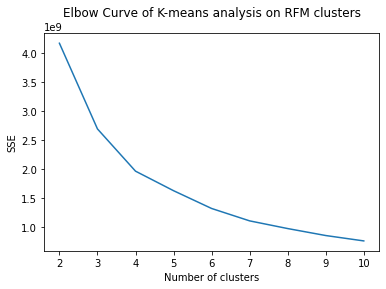

In [7]:
# Determine optimal number of clusters (using elbow method & silhouette score)
sse = [] # sum of squared errors 
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

    # Calculate the silhouette score of the clustering.
    # NOTE: The following lines are commented out due to computational time. The result is in the table below.
#     cluster_labels = kmeans.labels_
#     data_rfm_k = rfm_scaled.assign(Cluster = cluster_labels)
#     print(f'Silhouette Score(k={k}): {silhouette_score(rfm_scaled, cluster_labels)}')

plt.plot(range(2, 11), sse)
plt.title("Elbow Curve of K-means analysis on RFM clusters")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

Using the elbow method, you can visually identify the optimum value of K. The point at which the curve begins to 'look like an elbow', where the sharp decreasing gradient begins to plateau. For this dataset, a cluster size of 4 is ideal.

<a id="e-silhouette-score"></a>
## e) Silhouette Score
The silhouette score measures the distance between clusters and can determine the effectiveness of the clustering.
The score is between +1 and -1. A positive score indicates the separation between the clusters (good), and a negative score suggests overlapping clusters (bad).

| Cluster (w/o standardising) | Silhouette Score |
| --- | --- |
| 2 | 0.7350307132554209 |
| 3 | 0.4464181643710864 |
| 4 | 0.4674003977327137 |
| 5 | 0.3890712326513849 |
| 6 | 0.4065179623645617 |
| 7 | 0.4124540789458798 |
| 8 | 0.4124748554259864 |
| 9 | 0.4150074415670860 |
| 10 | 0.3693316077587359 |

In conclusion, this also shows that the cluster size of 4 seems to be the best number of clusters.

<a id="f-exploration"></a>
## f) RFM Exploration

Below are some statistics about the RFM clusters. This can help us check that the clustering worked as expected.

In [8]:
# Apply K-means clustering using k=4 (based on the elbow method chart and silhouette score)
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm_scaled)
rfm_scaled["cluster"] = kmeans.labels_

# Analyse cluster characteristics
rfm_scaled.groupby("cluster").describe()

frequency                                               monetary  \
            count      mean       std  min  25%  50%  75%   max    count   
cluster                                                                    
0         49993.0  1.029144  0.179042  1.0  1.0  1.0  1.0   5.0  49993.0   
1           745.0  1.088591  0.377728  1.0  1.0  1.0  1.0   5.0    745.0   
2         36708.0  1.024654  0.165769  1.0  1.0  1.0  1.0   6.0  36708.0   
3          5890.0  1.117317  0.472712  1.0  1.0  1.0  1.0  15.0   5890.0   

                      ...                    recency                          \
                mean  ...      75%      max    count        mean         std   
cluster               ...                                                      
0          99.398961  ...   138.99    364.3  49993.0  127.092173   72.522621   
1        1761.009356  ...  1977.00  13440.0    745.0  242.153020  160.435750   
2          99.845744  ...   134.99    419.9  36708.0  387.494933   95.782224   
3         555.527621  ...   665.89   1155.0   5890.0  229.774363  141.354673   

                                            
           min    25%    50%    75%    max  
cluster                                     
0          0.0   64.0  128.0  189.0  257.0  
1          3.0  102.0  229.0  360.0  690.0  
2        257.0  300.0  375.0  461.0  713.0  
3          0.0  118.0  214.0  317.0  693.0  

[4 rows x 24 columns]

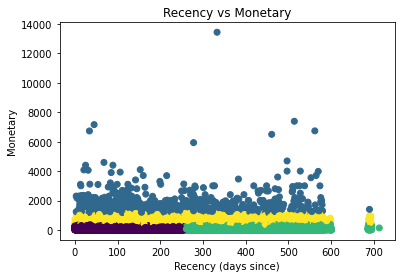

In [9]:
plt.scatter(rfm_scaled["recency"], rfm_scaled["monetary"], c=rfm_scaled["cluster"])
plt.xlabel("Recency (days since)")
plt.ylabel("Monetary")
plt.title("Recency vs Monetary")
plt.show()

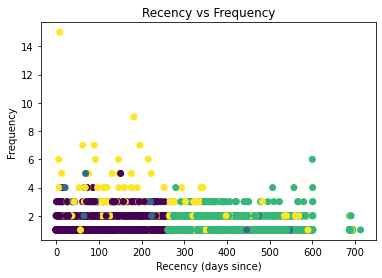

In [10]:
plt.scatter(rfm_scaled["recency"], rfm_scaled["frequency"], c=rfm_scaled["cluster"])
plt.xlabel("Recency (days since)")
plt.ylabel("Frequency")
plt.title("Recency vs Frequency")
plt.show()

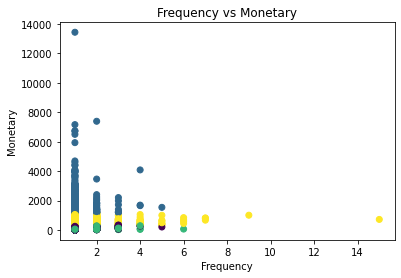

In [11]:
plt.scatter(rfm_scaled["frequency"], rfm_scaled["monetary"], c=rfm_scaled["cluster"])
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.title("Frequency vs Monetary")
plt.show()

In [12]:
# This will display the mean of the clusters.
print(rfm_scaled.pivot_table(columns=['cluster']))

cluster             0            1           2           3
frequency    1.029144     1.088591    1.024654    1.117317
monetary    99.398961  1761.009356   99.845744  555.527621
recency    127.092173   242.153020  387.494933  229.774363


Looking at the frequency statistic, we can see that Cluster 3 has the highest frequency value, meaning that customers in this cluster have made the most purchases. Cluster 1 has the second-highest frequency value, indicating that customers in this cluster have also made significant purchases.

Examining the monetary statistic, we can see that Cluster 1 has the highest monetary value, suggesting that customers in this cluster have spent the most on purchases. Cluster 3 has the second-highest monetary value, indicating that customers in this cluster have also spent a significant amount of money.

Analysing the recency statistic, we can see that Cluster 1 has the lowest recency value, which means that customers in this cluster have made their most recent purchases relatively recently. On the other hand, customers in Cluster 3 have the highest recency value, indicating that customers in this cluster made their most recent purchases relatively longer ago.

Overall, we can conclude that Cluster 1 consists of customers who are the most valuable to the business, as they have made the most purchases, spent the most money, and made their most recent purchases relatively recently. The other clusters consist of customers who are either less frequent, less valuable, or less recent and may require targeted marketing strategies to increase their engagement with the business.

<a id="g-summary"></a>
## g) Summary
* RFM was used to segment customers into similar groups to target them better with personalized product recommendations.
* Preprocessing from Subtask 1 is required for Customer Segmentation.
* The cluster size of 4 seems to be the best number of clusters.
* Clusters are ranked from 'worse customer (orders little and not often)' and the 'best customer (high spender, orders frequently)'.

<a id="2-geolocation-segmentation"></a>
# 2. Subtask 2: Geolocation Segmentation

Geolocation segmentation segments customers based on their location data (Karaman, 2019). This can help identify patterns in customer behaviour based on geographic regions, enabling businesses to customize marketing and sales strategies for specific regions.

We wanted to explore the possibility of incorporating Geolocation information into our recommender system. A person's spending habits and purchases can vary depending on their location. To achieve this, we need to gather data on the total spend of customers per zip code.

In [13]:
# Get the coordinates of each zip code prefix.
geolocation_unique = geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='first')
# Merge the zip code coordinates with the customers zip code
customer_coords = pd.merge(customers, geolocation_unique, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix")

# Count the number of occurrences of each pair of coordinates
customer_coords['count'] = customer_coords.groupby(['geolocation_lat', 'geolocation_lng'])['customer_unique_id'].transform('count')

merged_rfm_coords = pd.merge(customer_coords, rfm_scaled["monetary"], on="customer_unique_id", how="left")

# Group the rows by their coordinate locations
grouped = merged_rfm_coords.groupby(['geolocation_lat', 'geolocation_lng'])
customer_agg_monetary_geo = grouped.agg({'monetary': 'sum', 'customer_id': 'count'})
customer_agg_monetary_geo = customer_agg_monetary_geo.reset_index()

customer_agg_monetary_geo.head()

,geolocation_lat,geolocation_lng,monetary,customer_id
0,-36.605374,-64.283946,1492.09,11
1,-34.586422,-58.732101,8.00,1
2,-33.691423,-53.480161,1197.60,5
3,-33.525601,-53.366420,1750.75,12
4,-32.563952,-53.384720,1025.29,8


The resulting dataset "customer_agg_monetary_geo" has four columns: "geolocation_lat", "geolocation_lng", "monetary", and "customer_id". It shows the total monetary amount and the count of customers per coordinated location. This dataset can be used to analyse customers' spending patterns in different geographical areas and make recommendations based on their location.

The next step will be to create a density map using the Basemap library, showing the geographic distribution of monetary spending per zip code. This is useful because it allows us to visually identify geographic regions where customers spend more and can help inform our recommendation engine.

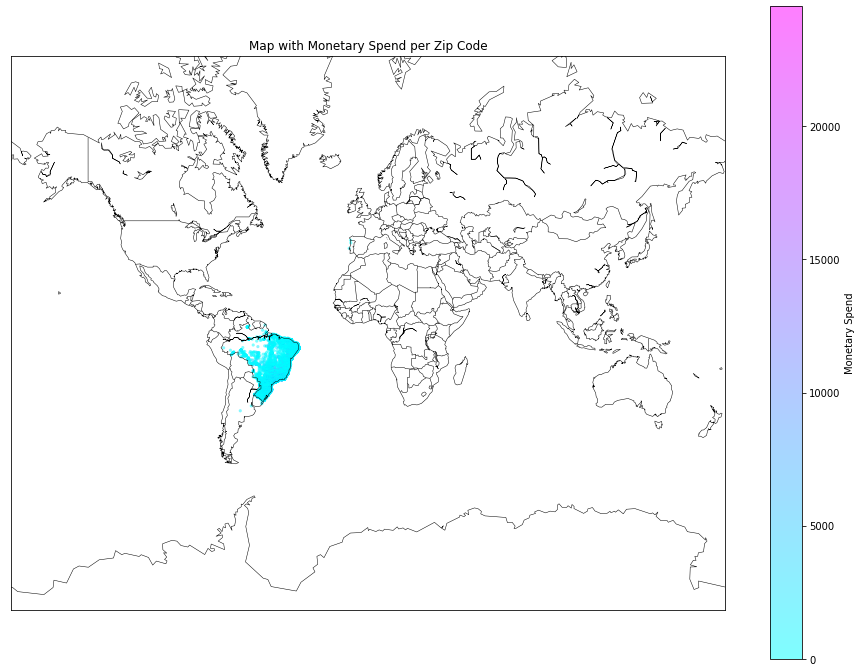

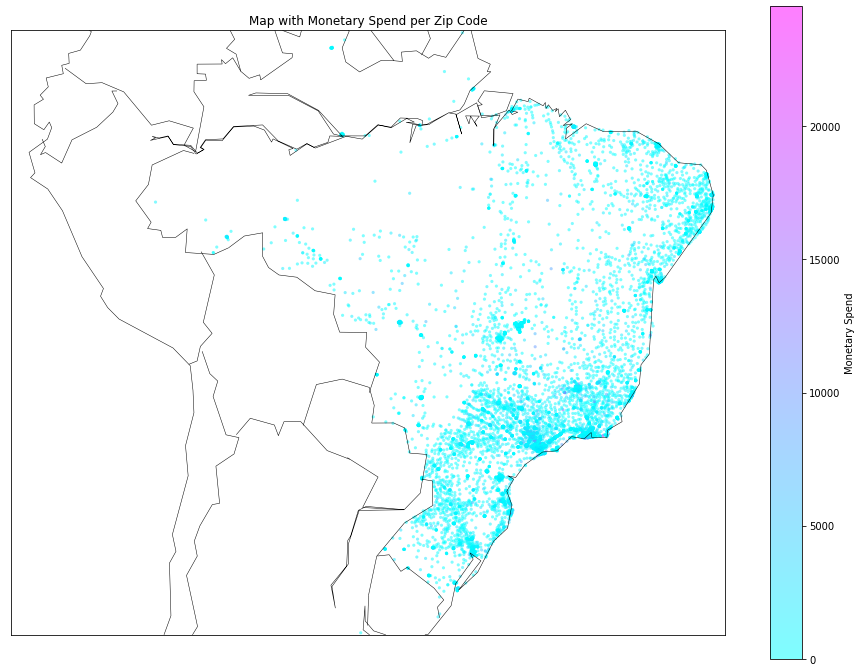

In [14]:
# Create density map
def drawDensityMap(llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180):
    m = Basemap(projection='merc',llcrnrlat=llcrnrlat,urcrnrlat=urcrnrlat,llcrnrlon=llcrnrlon,urcrnrlon=urcrnrlon,lat_ts=20,resolution='c')
    x, y = m(customer_agg_monetary_geo['geolocation_lng'].values, customer_agg_monetary_geo['geolocation_lat'].values)

    fig = plt.figure(figsize=(16, 12)) # set figure size

    # Plot the points and color them based on their count
    m.scatter(x, y, s=10, c=customer_agg_monetary_geo['monetary'], cmap='cool', alpha=0.5, linewidths=0.000000000001)
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)

    # Add a color bar
    plt.colorbar(label='Monetary Spend')

    plt.title('Map with Monetary Spend per Zip Code')
    plt.show()
    
drawDensityMap()
drawDensityMap(llcrnrlat=-34.7,urcrnrlat=4,llcrnrlon=-82.5,urcrnrlon=-34)

<a id="2a-summary"></a>
## a) Summary

* The amount of spending is relatively low in Brazil.
* There is no specific region which tends to spend more.
* Customers are spread all over Brazil, throughout the larger cities and smaller towns/villages.


<a id="3_conclusion"></a>
# 3. Subtask 2: Conclusion and Next Steps
The insights derived from customer segmentation can be very valuable to a business. By understanding the characteristics and behaviours of different customer segments, businesses can tailor their marketing strategies, product offerings, and customer experiences to better meet the needs and preferences of each segment (Karaman, 2019). This can result in increased customer satisfaction and loyalty, higher sales and revenue, and improved overall business performance. For example, a business might identify that its most valuable customers are those in a certain age range or geographic location and use this information to create targeted marketing campaigns or develop new products that specifically appeal to this segment. Alternatively, a business might identify that a certain segment has low engagement and high churn rates and use this information to improve its customer experience and reduce attrition. Overall, customer segmentation provides businesses with actionable insights that can help them optimise their operations and drive success.

After evaluating various customer segmentation methods, we decided to use the RFM method, using a cluster size of 4, as the main outcome as it provided the best results in identifying distinct and actionable customer segments. RFM allowed us to categorise customers based on their purchase behaviour and to assign a score to each of them, which could then be used to differentiate between high-value and low-value customers. Therefore, we concluded that the RFM method was the most suitable approach for this assignment, as geolocation segmentation proved not to correlate with location and a customer's spending.

We will use the insights gained from the RFM customer segmentation analysis to develop a recommender system tailored to each customer segment. By understanding the unique characteristics of each customer group, we can provide personalised recommendations that are more likely to be relevant to their needs and preferences. For example, customers in the high-frequency and high-monetary group may be more interested in premium or exclusive products, while those in the low-frequency and low-monetary group may prefer discounts or promotions. By incorporating these insights into our recommender system, we can increase the likelihood of customer engagement and loyalty, ultimately leading to increased sales and revenue.

<br>_[Go to top](#top-of-page)_

<a id="4_references"></a>
# 4. References

Chandana, D. (2021) Exploring Customers Segmentation With RFM Analysis and K-Means Clustering. Available from: https://medium.com/web-mining-is688-spring-2021/exploring-customers-segmentation-with-rfm-analysis-and-k-means-clustering-118f9ffcd9f0 [Accessed 3 March 2023].

Fotanella, C. (2018) A Beginner's Guide to Customer Behavior Analysis. Hubspot [blog]. Available from: https://blog.hubspot.com/service/customer-behavior-analysis [Accessed 3 March 2023].

Karaman, B. (2019) Customer Segmentation. Towards Data Science. Available from: https://medium.com/towards-data-science/data-driven-growth-with-python-part-2-customer-segmentation-5c019d150444 [Accessed 01 May 2023].

End of subtask 2